# Closer look at correlation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_size = 800

In [3]:
feat1 = np.random.randn(sample_size)
feat2 = np.random.randn(sample_size)
df = pd.DataFrame(data={'feat_1':feat1,'feat_2':feat2})

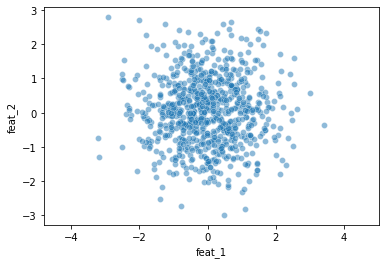

In [4]:
ax = sns.scatterplot(data=df, x='feat_1', y='feat_2', alpha=0.5)
ax.set_aspect('equal', adjustable='datalim')

## What is it?

Correlation describes the relationship, whether causal or not, between two variables (e.g. feat<sub>1</sub>, feat<sub>2</sub>). The figures usually range from -1 to 1:
* 1 => _perfect_ correlation. feat<sub>2</sub> = s * feat<sub>1</sub> where s is positive.
* 0 => no correlation
* -1 => _perfect_ negative correlation. feat<sub>2</sub> = s * feat<sub>1</sub> where s is negative.

## pandas.DataFrame.corr(method=...)
* **pearson** : (default) standard correlation coefficient
* **kendall** : Kendall Tau correlation coefficient
* **spearman** : Spearman rank correlation

## Which to use?
* Are both variables on a continuous scale?
    * pearson
* Are your variables ordinal (e.g. marks of a test, star raitings) ?
    * spearman
    * kendall

## Important assumption: Monotonic

See image on https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535

## Continuous variables with different correlation methods

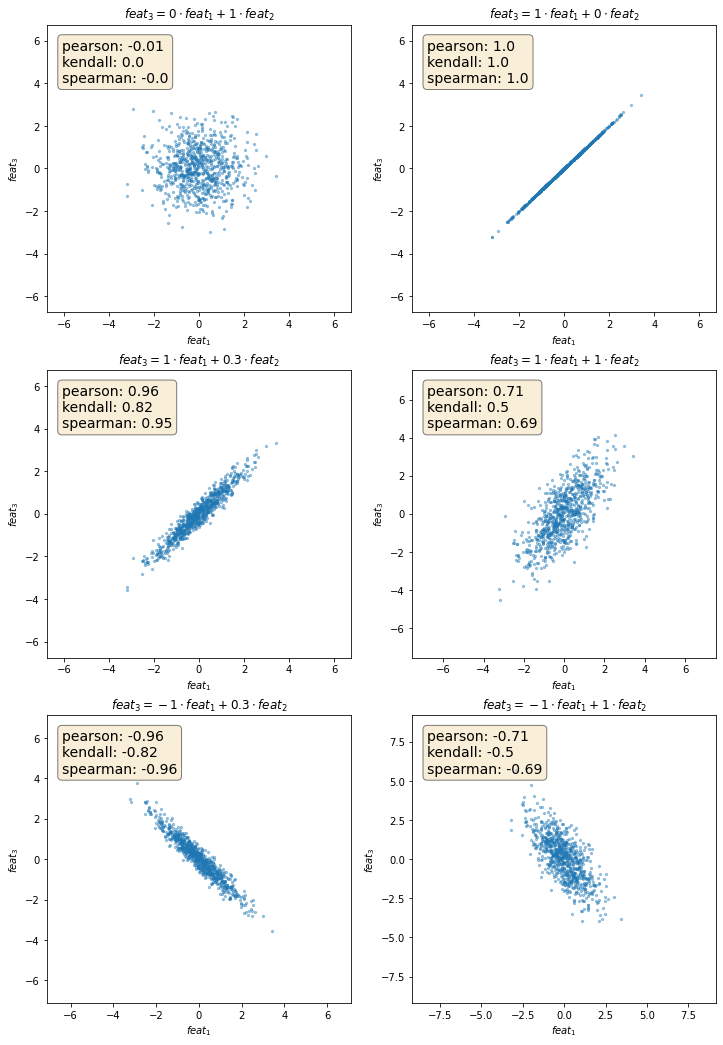

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(2*6,2*9))

plots = [
    {'a1':0, 'a2':1, 'c':0},
    {'a1':1, 'a2':0, 'c':0},
    
    {'a1':1, 'a2':0.3, 'c':0},
    {'a1':1, 'a2':1, 'c':0},
    
    {'a1':-1, 'a2':0.3, 'c':0},
    {'a1':-1, 'a2':1, 'c':0}
]

counter = -1
for ax_row in axs:
    for ax in ax_row:
        counter += 1
        a1 = plots[counter]['a1']
        a2 = plots[counter]['a2']
        c  = plots[counter]['c']
        df['feat_3'] = a1*df.feat_1 + a2*df.feat_2 + c
        
        ax.scatter(x=df['feat_1'], y=df['feat_3'], alpha=0.4, s=5)
        title='${feat_3}='+str(round(a1,2))+r' \cdot {feat_1} + '+str(round(a2,2))+' \cdot {feat_2}$'
        ax.set_title(title)
        ax.set_ylabel('${feat_3}$')
        ax.set_xlabel('${feat_1}$')
        
        axis = np.max(ax.axis())+3
        ax.axis((-axis,axis,-axis,axis))
        
        # add text box
        methods = ['pearson', 'kendall', 'spearman']
        lines = [ method+": "+str(round(df.corr(method=method).loc['feat_1','feat_3'],2)) for method in methods ]
        textstr = '\n'.join(lines)
                            
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

In [6]:
fig.savefig('correlations.pdf')